In [31]:
import os
# Verificar si el archivo existe
input_file = "../files/input/news.csv"
if not os.path.exists(input_file):
    raise FileNotFoundError(f"El archivo {input_file} no existe.")

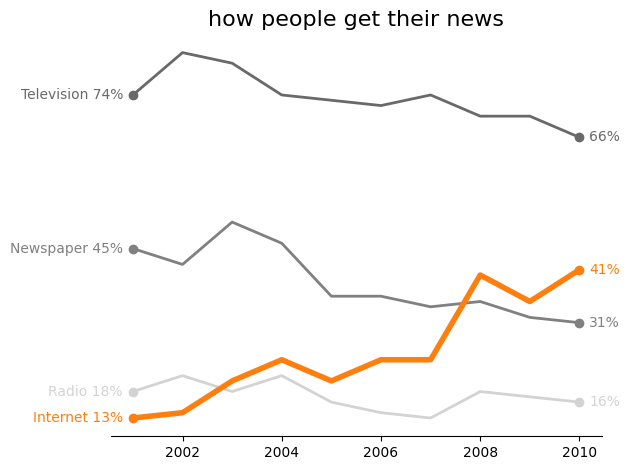

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.Figure()

colores= {
    'Television': 'dimgray',
    'Newspaper': 'grey',
    'Internet': 'tab:orange',
    'Radio': 'lightgrey',
}

zorder = {
    'Television': 1,
    'Newspaper': 1,
    'Internet': 2,
    'Radio': 1,
}

linewidths = {
    'Television': 2,
    'Newspaper': 2,
    'Internet': 4,
    'Radio': 2,
}

df = pd.read_csv("../files/input/news.csv", index_col=0)
for i in df.columns:
    plt.plot(
        df[i],
        color=colores[i],
        zorder=zorder[i],
        linewidth=linewidths[i], 
        label=i)

plt.title("how people get their news", fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

for i in df.columns:
    first_year = df.index[0]
    plt.scatter(
        x=first_year,
        y=df[i][first_year],
        color=colores[i],
        zorder=zorder[i],
    )

    last_year = df.index[-1]
    plt.scatter(
        x=last_year,
        y=df[i][last_year],
        color=colores[i],
        zorder=zorder[i],
    )

    plt.text(
        first_year - 0.2,
        df[i][first_year],
        i + " " + str(df[i][first_year]) + "%",
        ha = 'right',
        va = 'center',
        color = colores[i],
    )

    plt.text(
        last_year + 0.2,
        df[i][last_year],
        str(df[i][last_year]) + "%",
        ha = 'left',
        va = 'center',
        color = colores[i],
    )

# Crear el directorio si no existe
os.makedirs("../files/output", exist_ok=True)

#guardar figura
plt.tight_layout()
plt.savefig("../files/output/news.png")
plt.show()